# Vortex Indicator (VI)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import classification_report_generator as crg
from ta.trend import VortexIndicator

import sys
sys.path.insert(0, '..')
import useful_functions as uf

In [11]:
df = pd.read_csv("../data/BTCUSDT-hour-target-dip.csv")

## Variations and default correlations

In [12]:
def variations(windows:list[int]):
    """
    returns variations of atr indicator with given windows
    """
    name = "vi_"
    for w in windows:
        i = VortexIndicator(df.high, df.low, df.close, window=w)
        sma_name = name + str(w)
        df[sma_name + "_diff"] = i.vortex_indicator_diff()
        df["test"] = list(map(lambda x: uf.log_abs(x*1000), i.vortex_indicator_diff()))
        df[sma_name + "_neg"] = i.vortex_indicator_neg()
        df[sma_name + "_pos"] = i.vortex_indicator_pos()

#         df[sma_name + "_diff"] = list(map(lambda s, c: uf.none_subtraction(s, c), df[sma_name], df.close))
#         df[sma_name + "_diff_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), df[sma_name + "_diff"]))
#         df[sma_name + "_diff_o_close"] = list(map(lambda s, c: s/c, df[sma_name + "_diff"], df.close))
#         df[sma_name + "_diff_o_close_log"] = list(map(lambda x: uf.log_abs(x*100, zeros=True), df[sma_name + "_diff_o_close"]))
#         df[sma_name + "_rate"] = uf.get_rate(df[sma_name])
# #         df[sma_name + "_rate_o_close"] = list(map(lambda r, c: r/c, df[sma_name + "_rate"], df.close))
#         df[sma_name + "_rate_log"] = list(map(lambda x: uf.log_abs(x, zeros=True), df[sma_name + "_rate"]))
# #         df[sma_name + "_diff_o_close_rate"] = uf.get_rate(df[sma_name + "_diff_o_close"])
        
        
        

In [4]:
variations([50])

In [5]:
indicators = list(df.columns)[13:]
indicators.append("target")
len(indicators)

6

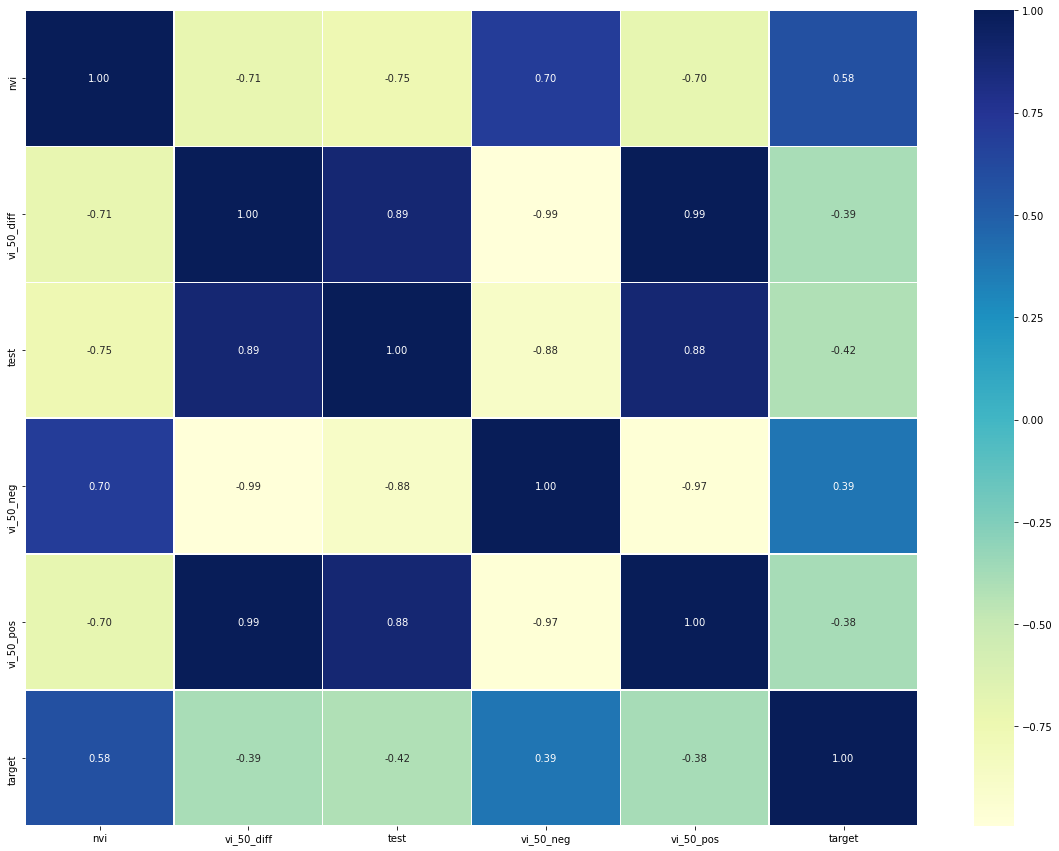

In [6]:
d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [8]:
d = df[-2000:]

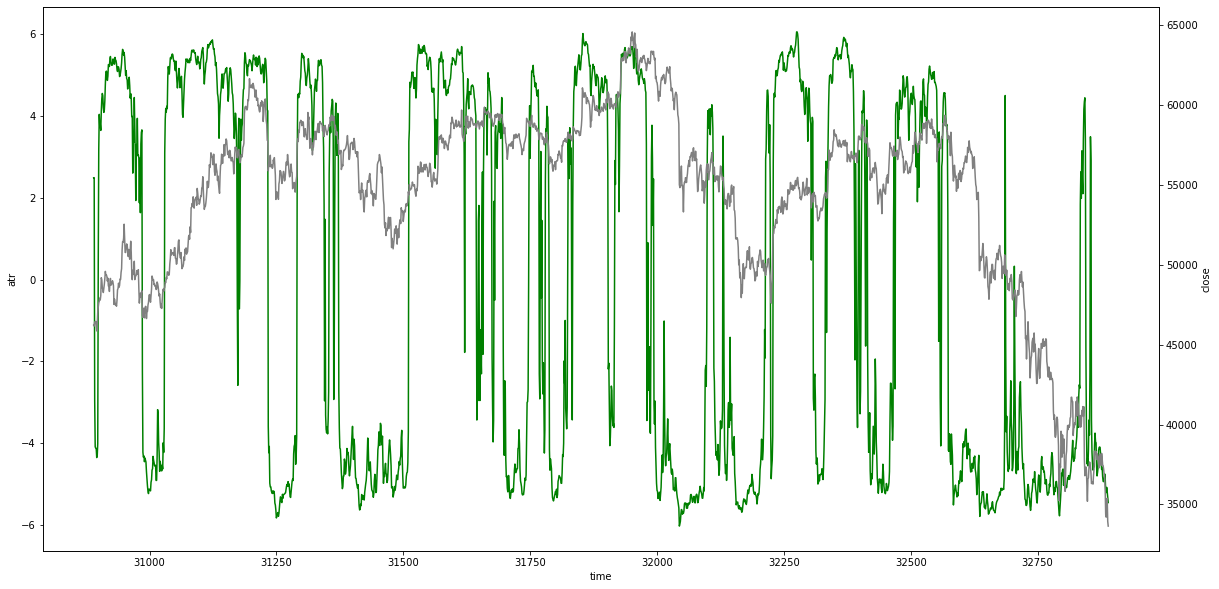

In [9]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(d.test,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(d.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()